### Library

In [15]:
# tool kit
import warnings
warnings.filterwarnings('ignore')

# algumas blibliotecas para manipulação de dados:
import math as m
import numpy as np
import pandas as pd

# algumas bibliotecas para data-viz:
import seaborn as sns
import matplotlib.pyplot as plt

# algumas bibliotecas para processamento de dados ordenados - time series:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# algumas bibliotecas para avaliação dos nossos modelos:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

ImportError: cannot import name 'lib' from partially initialized module 'numpy' (most likely due to a circular import) (c:\Users\georg\anaconda3\lib\site-packages\numpy\__init__.py)

In [16]:
!pip3.9 uninstall numpy

### Transform

In [ ]:
df = pd.read_csv('Base de Dados - Questionário.xlsx - Sheet1.csv')
df = df.drop(df.columns[0:2], axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,2019-01-21
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,2018-12-02
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,2018-12-05
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,2019-08-01
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,2019-11-25


In [ ]:
df.Discount = df.Discount.str.replace(',', '.')
df.UnitPrice = df.UnitPrice.str.replace(',', '.')
df.Discount = pd.to_numeric(df.Discount)
df.UnitPrice = pd.to_numeric(df.UnitPrice)

In [ ]:
df.columns

Index(['ID', 'ProductID', 'ClientID', 'Discount', 'UnitPrice', 'Quantity',
       'StoreID', 'Date'],
      dtype='object')

In [ ]:
df_model = df.drop(['ID', 'ProductID', 'ClientID', 'Discount', 'UnitPrice','StoreID'], axis=1)
df_model = df_model.groupby(pd.Grouper(key='Date', freq='m')).sum()


# Modelagem 

In [ ]:
df_model.head()

,Quantity
Date,
2018-03-31,1417
2018-04-30,1434
2018-05-31,1523
2018-06-30,1921
2018-07-31,2031


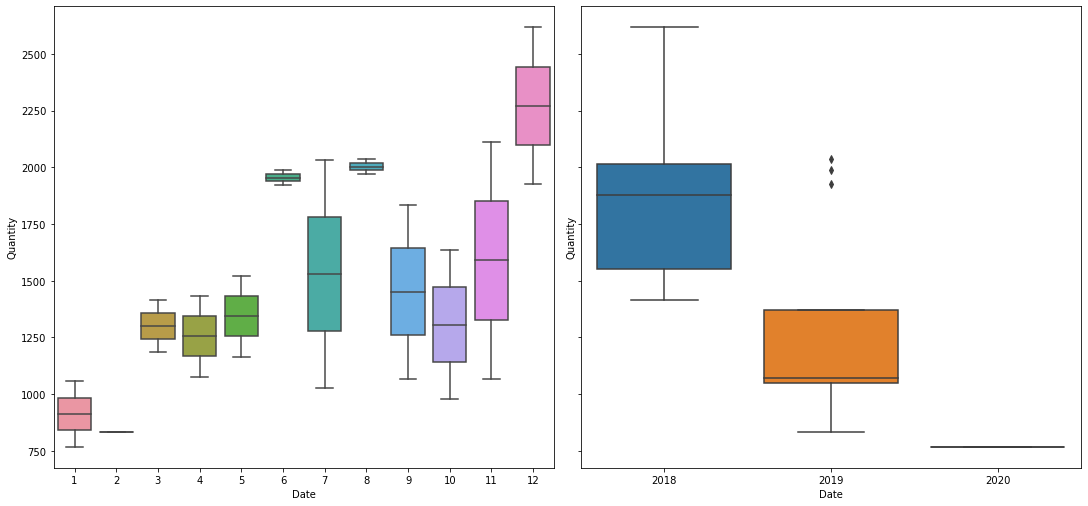

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,7), sharey=True)
fig.tight_layout()
sns.boxplot(x=df_model.index.month, y=df_model.iloc[:, 0], orient='v', ax=ax[0])
sns.boxplot(x=df_model.index.year, y=df_model.iloc[:, 0], orient='v', ax=ax[1]);


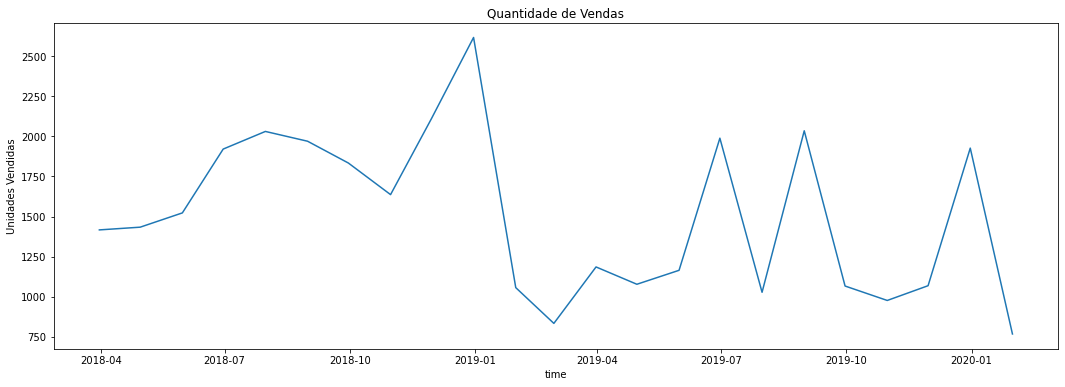

In [ ]:
# Agora sim! Conseguimos começar a EDA da nossa série com mais segurança!

# Vamos ver sua distribuição real!
plt.figure(figsize=(18, 6))
plt.plot(df_model)

plt.title('Quantidade de Vendas')
plt.ylabel('Unidades Vendidas')
plt.xlabel('time');

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # ADF Test
    result = adfuller(timeseries, autolag='AIC')

    print('Augmented Dickey Fuller test (ADH Test)')
    print('='*40)
    print(f'ADF Statistic: {result[0]:>24}')
    print('-'*40)
    print(f'p-value:       {result[1]:>24}')
    print('-'*40)
    print('Critial Values:')
    print('-'*40)
    for key, value in result[4].items():
        print(f'{key:>4} :{value:>33}')
    print('='*40)

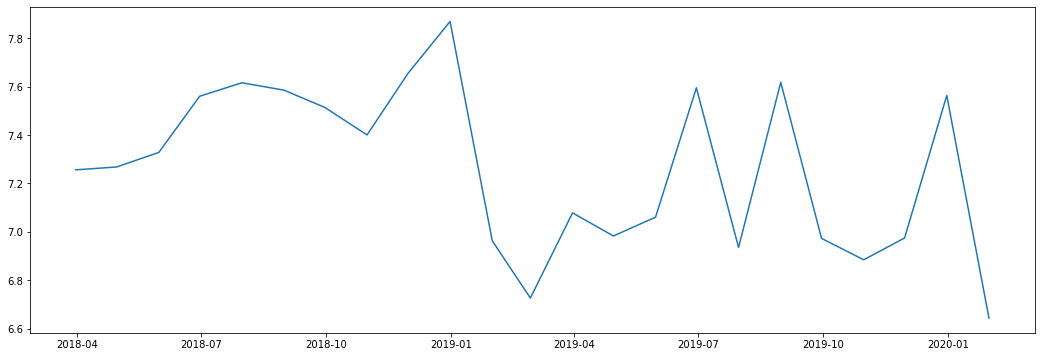

In [ ]:
plt.figure(figsize=(18, 6))
df_log = np.log(df_model)
plt.plot(df_log);

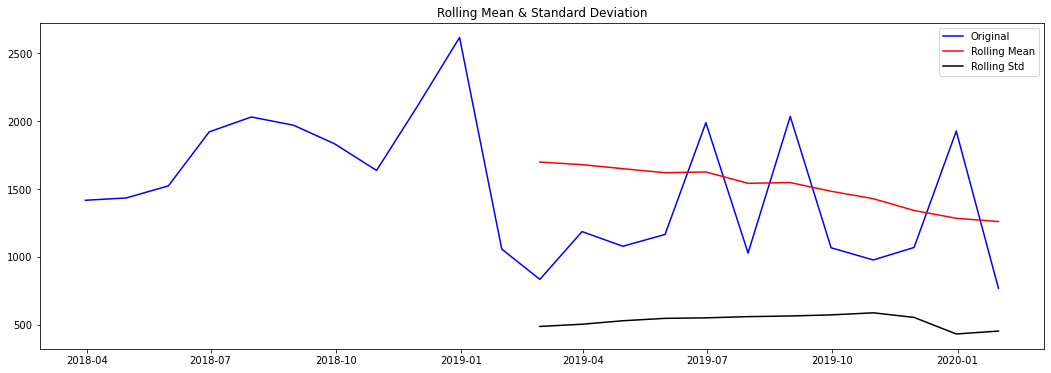

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:      -1.5341964666210846
----------------------------------------
p-value:              0.516532153015704
----------------------------------------
Critial Values:
----------------------------------------
  1% :                -4.01203360058309
  5% :              -3.1041838775510207
 10% :              -2.6909873469387753


In [ ]:
plt.figure(figsize=(18, 6))
test_stationarity(df_model)

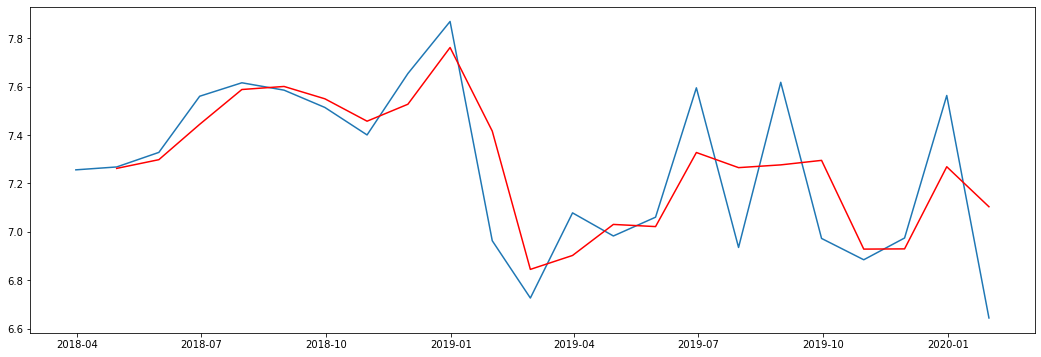

In [ ]:
# Vamos analiar a MA dessa série:
plt.figure(figsize=(18, 6))
moving_avg = df_log.rolling(2).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red');

In [ ]:
ts_log_moving_avg_diff = df_log - moving_avg
ts_log_moving_avg_diff.head()

,Quantity
Date,
2018-03-31,NaN
2018-04-30,0.005963
2018-05-31,0.030107
2018-06-30,0.116082
2018-07-31,0.027841


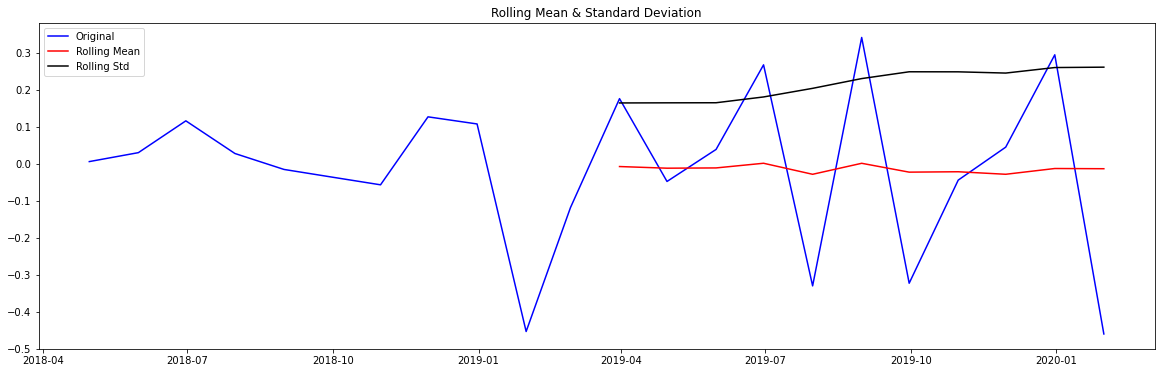

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:      0.34441165116773464
----------------------------------------
p-value:             0.9792927913392206
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -4.137829282407408
  5% :              -3.1549724074074077
 10% :              -2.7144769444444443


In [ ]:
plt.figure(figsize=(20, 6))
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

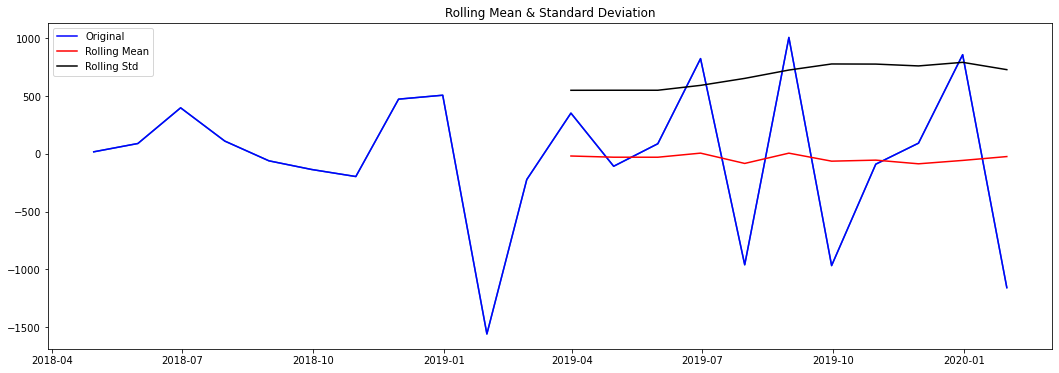

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:        1.206101806807708
----------------------------------------
p-value:             0.9960277709122045
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -4.137829282407408
  5% :              -3.1549724074074077
 10% :              -2.7144769444444443


In [ ]:
plt.figure(figsize=(18, 6))
ts_sft = df_model - df_model.shift()
plt.plot(ts_sft)
test_stationarity(ts_sft.dropna())

### Forecasting

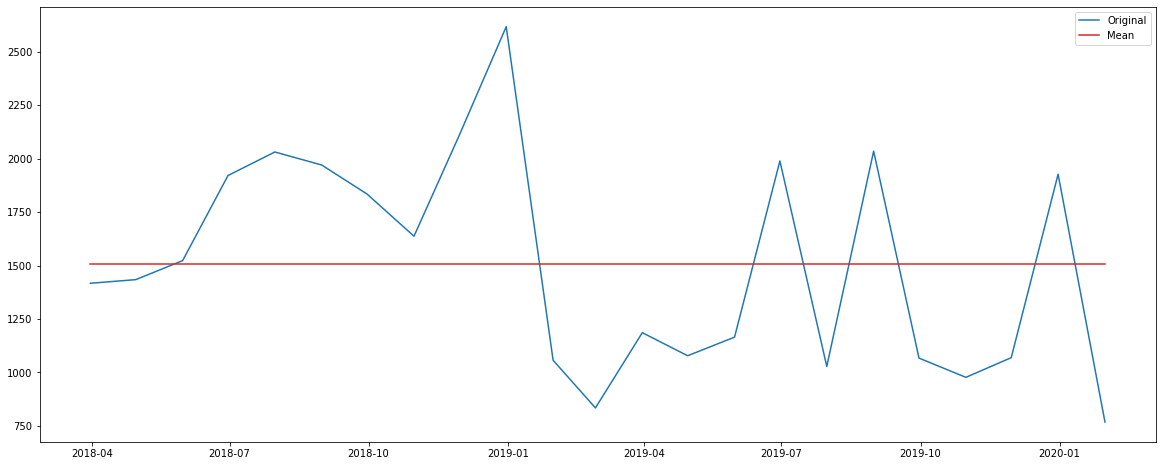

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df_model, color='C0',label='Original')
plt.plot(df_model.index, [df_model.Quantity.mean() for _ in df_model.index], label=f'Mean', c='C03')
plt.legend()

In [ ]:
df_model['order'] = range(df_model.shape[0])

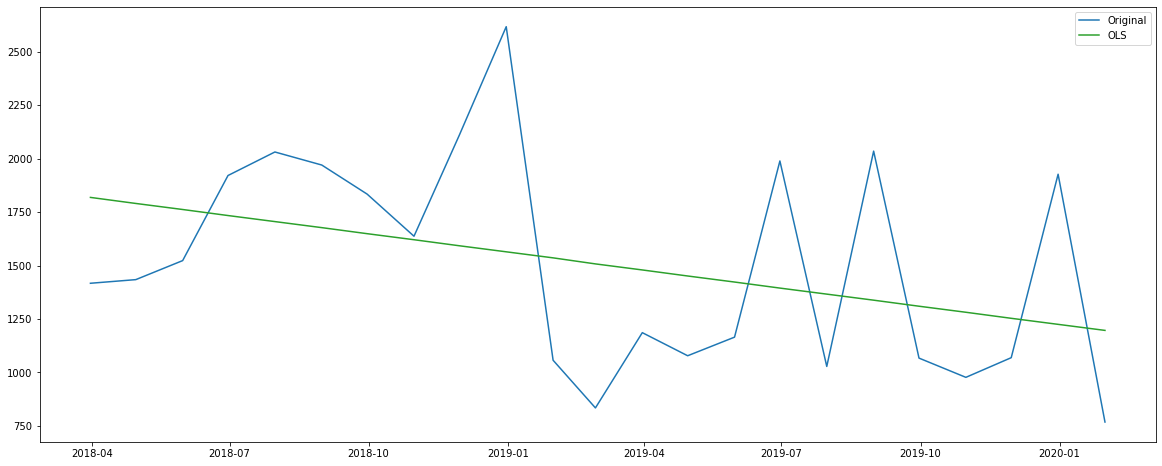

In [ ]:
from sklearn.linear_model import LinearRegression

df_model['order'] = range(df_model.shape[0])
reg = LinearRegression().fit(df_model[['order']], df_model.Quantity)

plt.figure(figsize=(20, 8))
plt.plot(df_model.Quantity, color='C0',label='Original')
plt.plot(df_model.index, reg.predict(df_model[['order']]), label=f'OLS', c='C02')
plt.legend();


In [ ]:
df_model = df_model[['Quantity']]
df_model.head()

,Quantity
Date,
2018-03-31,1417
2018-04-30,1434
2018-05-31,1523
2018-06-30,1921
2018-07-31,2031


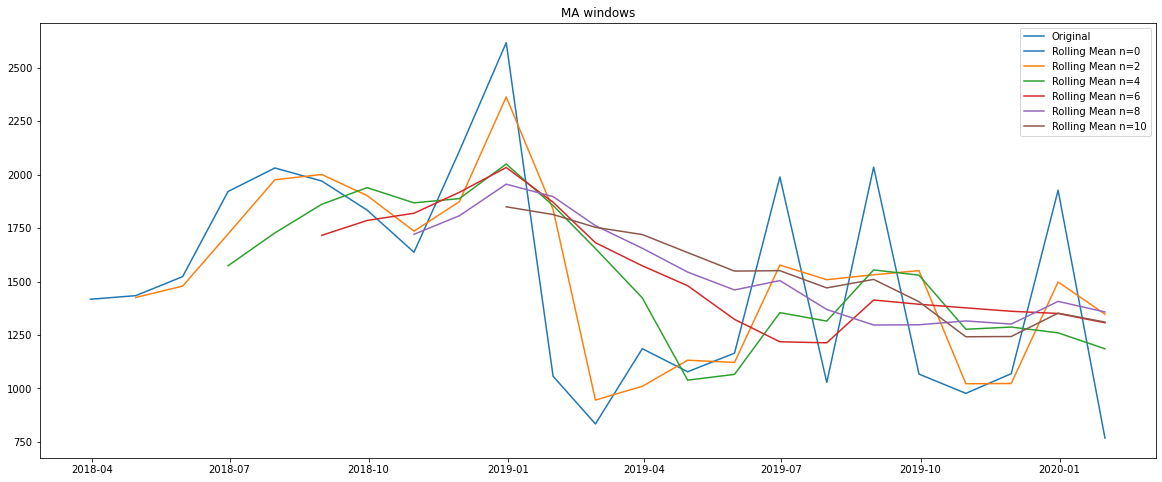

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df_model, color='C0',label='Original')
for i in range(0, 12, 2):
    
    rolmean = df_model.rolling(i).mean()

    #Plot rolling statistics:
    plt.plot(rolmean, label=f'Rolling Mean n={i}')

plt.legend(loc='best')
plt.title('MA windows')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

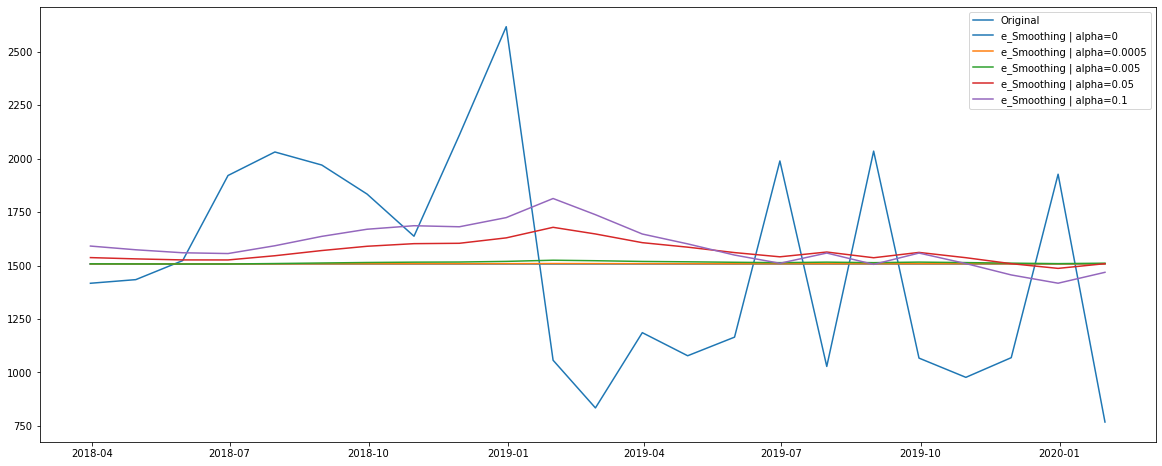

In [ ]:
model = SimpleExpSmoothing(df_model)

plt.figure(figsize=(20, 8))
plt.plot(df_model.Quantity, color='C0',label='Original')

for alpha in [0, .0005, .005, .05, .1]:
    
    # fit model
    model_fit = model.fit(alpha)
    # make prediction
    yhat = model_fit.predict(df_model.index.min(), df_model.index.max())

    plt.plot(df_model.index, yhat, label=f'e_Smoothing | alpha={alpha}')

plt.legend()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_empty = ARIMA(df_model, order=(0, 0, 0)).fit()
print(model_empty.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   23
Model:                          ARIMA   Log Likelihood                -175.232
Date:                Fri, 04 Nov 2022   AIC                            354.463
Time:                        11:25:03   BIC                            356.734
Sample:                    03-31-2018   HQIC                           355.034
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1507.5657    107.697     13.998      0.000    1296.483    1718.649
sigma2      2.417e+05   1.03e+05      2.347      0.019    3.99e+04    4.44e+05
Ljung-Box (L1) (Q):                   0.55   Jarque-

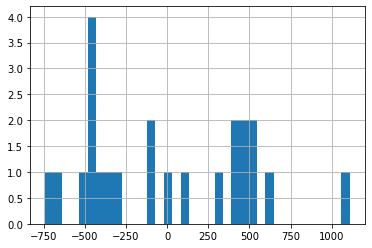

In [ ]:
model_empty.resid.hist(bins=36);

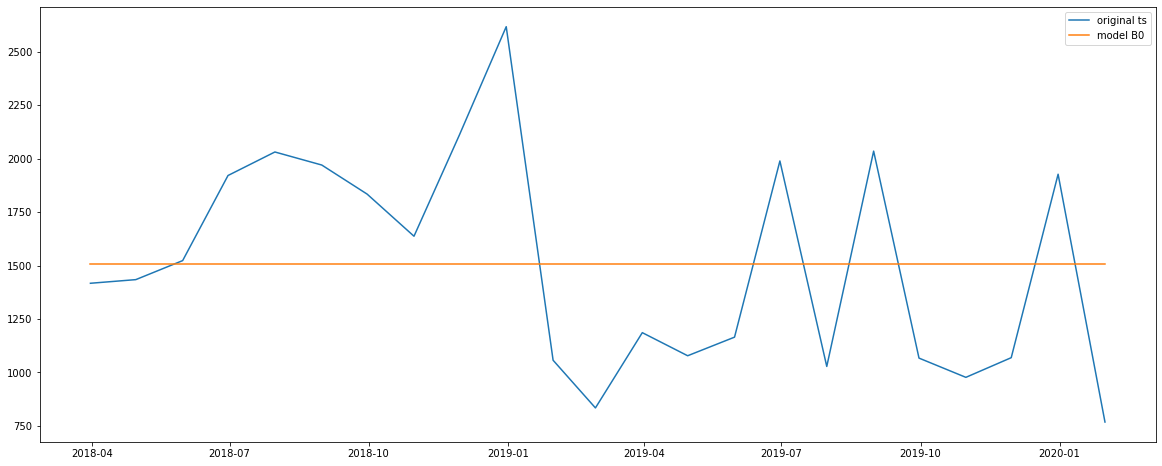

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(df_model, label='original ts')
plt.plot(model_empty.predict(), label='model B0')
plt.legend();

In [ ]:
model_ma = ARIMA(df_model, order=(0, 0, 1)).fit()
print(model_ma.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   23
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -175.020
Date:                Fri, 04 Nov 2022   AIC                            356.041
Time:                        11:25:04   BIC                            359.447
Sample:                    03-31-2018   HQIC                           356.897
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1505.5824    123.512     12.190      0.000    1263.503    1747.662
ma.L1          0.1272      0.198      0.642      0.521      -0.261       0.515
sigma2      2.381e+05   1.05e+05      2.273      0.0

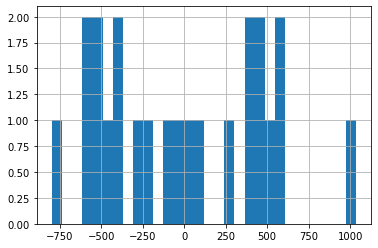

In [ ]:
model_ma.resid.hist(bins=30);

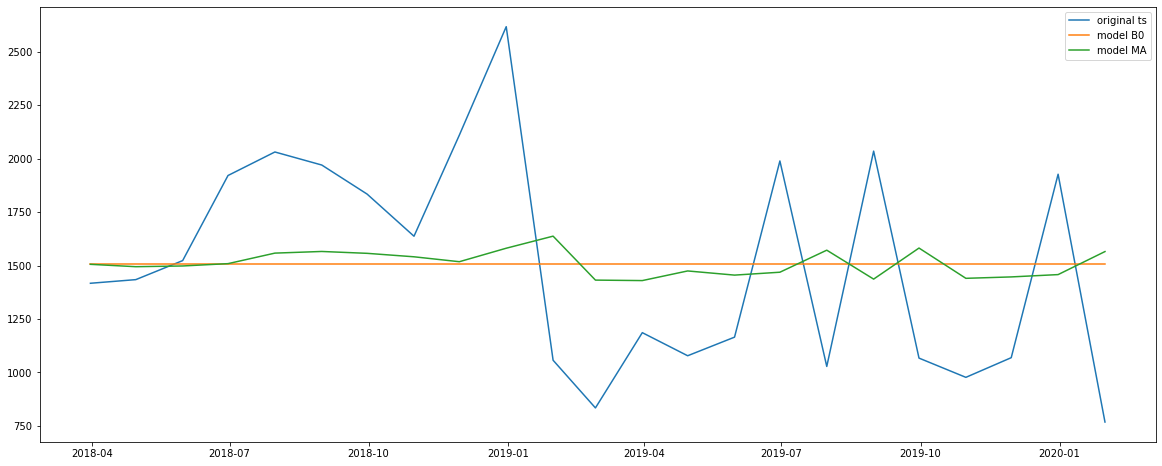

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(df_model, label='original ts')
plt.plot(model_empty.predict(), label='model B0')
plt.plot(model_ma.predict(), label='model MA')
plt.legend();

In [ ]:
model_ar = ARIMA(df_model, order=(3, 0, 0)).fit()
print(model_ar.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   23
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -174.855
Date:                Fri, 04 Nov 2022   AIC                            359.710
Time:                        11:25:04   BIC                            365.387
Sample:                    03-31-2018   HQIC                           361.137
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1504.6914    149.467     10.067      0.000    1211.742    1797.641
ar.L1          0.1296      0.199      0.651      0.515      -0.261       0.520
ar.L2          0.1001      0.253      0.395      0.6

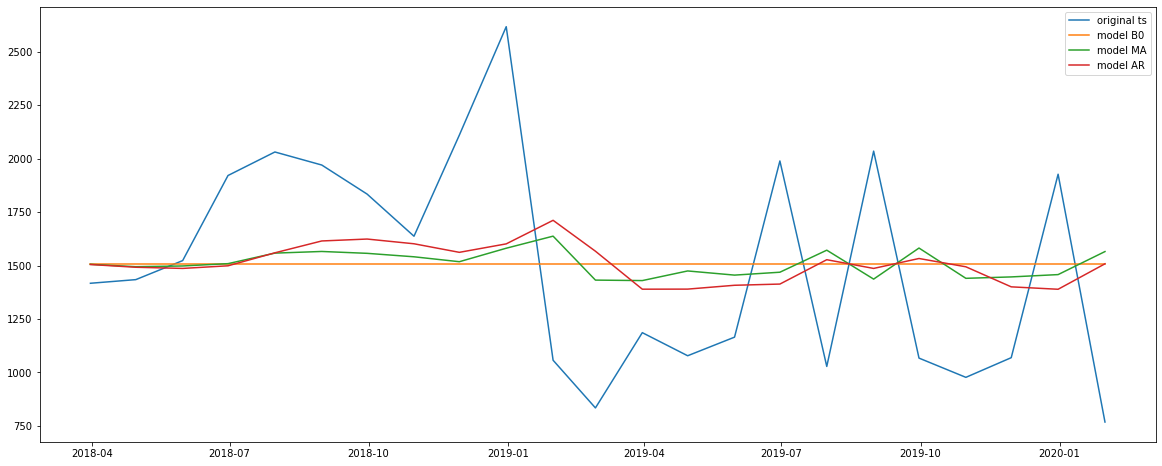

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(df_model, label='original ts')
plt.plot(model_empty.predict(), label='model B0')
plt.plot(model_ma.predict(), label='model MA')
plt.plot(model_ar.predict(), label='model AR')
plt.legend();

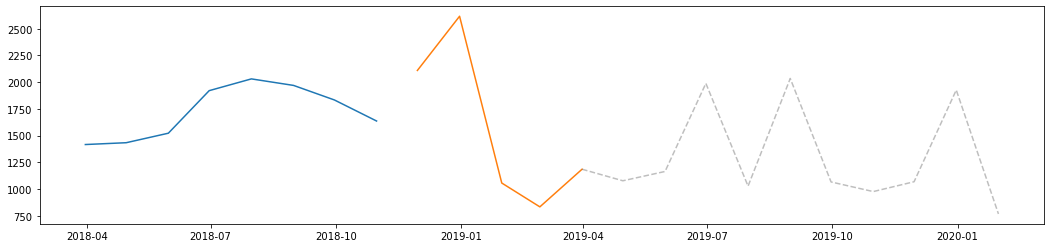

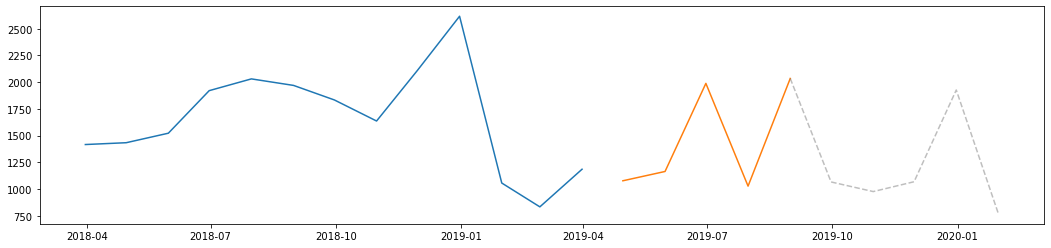

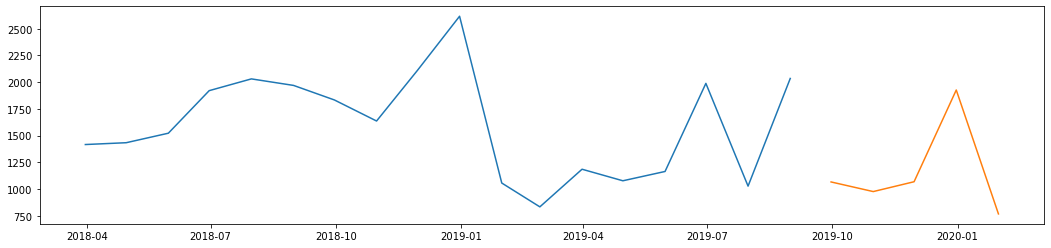

In [ ]:
tscv = TimeSeriesSplit(n_splits=3) # gap=40, test_size=90, max_train_size=40
train_sets = tscv.split(df_model)

for train, test in train_sets: 
    
    plt.figure(figsize=(18, 4))
    plt.plot(df_model.iloc[train, :])
    plt.plot(df_model.iloc[test, :])
    plt.plot(df_model.iloc[train[-1]:test[0], :], color='C7', linestyle='--', alpha=.5)
    plt.plot(df_model.iloc[test[-1]:, :], color='C7', linestyle='--', alpha=.5)
    plt.show();

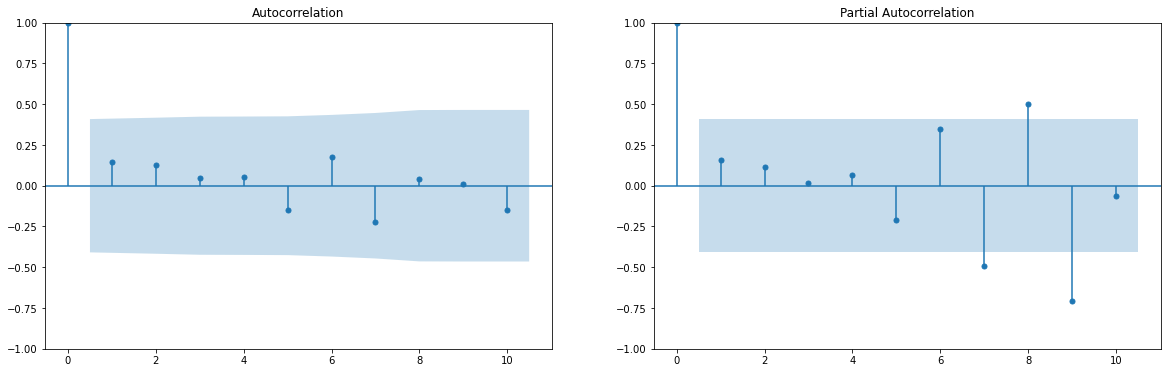

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plot_acf(df_model, lags=10, ax=ax[0])
plot_pacf(df_model, lags=10, method='ols', ax=ax[1])
plt.show()

## Models

In [8]:
import numpy as np

ImportError: cannot import name 'lib' from partially initialized module 'numpy' (most likely due to a circular import) (c:\Users\georg\anaconda3\lib\site-packages\numpy\__init__.py)

In [5]:
plot_acf(df_model)
plt.show()

NameError: name 'plot_acf' is not defined

### ARIMA

In [ ]:
rolmean_log = df_log.rolling(2).mean()
rolstd_log = df_log.rolling(2).std()

In [ ]:
df_log_ma = df_log - rolmean_log

In [ ]:
X = df_log_ma.dropna().values

size = int(len(X) * .8)
train, test = [_ for _ in X[0:size]], [_ for _ in X[size:len(X)]]

In [ ]:
predict = []
model_type = {'model_name': 'arima', 'params': [(1, 0, 1)]}
for t in range(len(test)):
    if model_type['model_name'].lower() == 'arima':
        model = ARIMA(train, order=model_type['params'][0])    
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predict.append(yhat)
    obs = test[t]
    train.append(obs)
    print(f'predicted= {round(yhat, 5):10},  expected= {obs}')
    
error = mean_squared_error(test, predict)
print('-'*32, f'\nTest MSE: {round(error, 5)}')

predicted=   -0.14073,  expected= [-0.32282242]
predicted=     0.0603,  expected= [-0.0440598]
predicted=    0.06655,  expected= [0.04499613]
predicted=    0.01716,  expected= [0.29462038]
predicted=    -0.1835,  expected= [-0.45996497]
-------------------------------- 
Test MSE: 0.03959


c:\Users\georg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(test, predict)

0.9908690566431766

### SARIMA

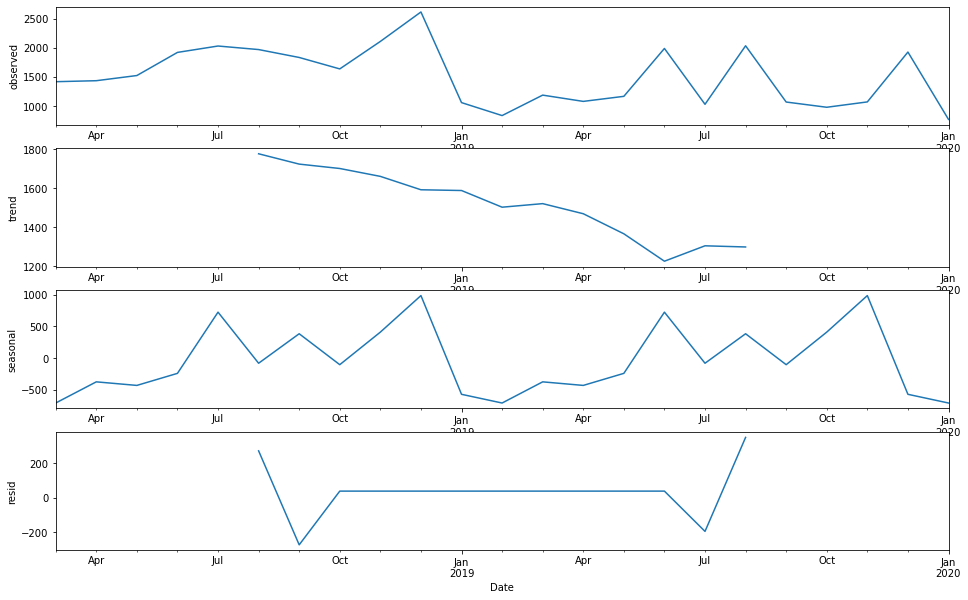

In [ ]:
# Vamos realizar uma decomposição aditiva da nossa série, e estudar sua tendência, sazonalidade e resíduo.
decomposition = seasonal_decompose(df_model.Quantity, period=11)

fig, ax = plt.subplots(4, 1, figsize=(16, 10))
decomposition.observed.plot(ax=ax[0]); ax[0].set_ylabel('observed')
decomposition.trend.plot(ax=ax[1]); ax[1].set_ylabel('trend')
decomposition.seasonal.plot(ax=ax[2]); ax[2].set_ylabel('seasonal')
decomposition.resid.plot(ax=ax[3]); ax[3].set_ylabel('resid');

In [ ]:
predictions = []
for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(train, 
                                      order=(1, 0, 0), 
                                      seasonal_order=(1, 0, 1, 12), 
                                      initialization='approximate_diffuse')
    
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    train.append(obs)
    
    print(f'predicted= {round(yhat, 1)},  expected= {obs}')
    
error = mean_squared_error(test, predictions)

print('-'*32, f'\nTest MSE: {round(error, 8)}')

predicted= -0.1,  expected= [-0.32282242]
predicted= 0.3,  expected= [-0.0440598]
predicted= 0.1,  expected= [0.04499613]
predicted= -0.0,  expected= [0.29462038]
predicted= 0.1,  expected= [-0.45996497]
-------------------------------- 
Test MSE: 0.12721998


In [ ]:
mean_absolute_percentage_error(test, predictions)

2.4622727097940342